Aufgabe 16.
Untersuchen Sie Trainings- und Testfehler für einen künstlichen Datensatz mit folgender zugrunde liegender wahrer Funktion:
$$
f(x) = x \cdot \cos(2\pi x)
$$

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import seaborn as sns

In [67]:
sns.set(style="whitegrid")
pd.set_option('display.max_columns', 100)
healthy_orange = '#EC6602'
healthy_orange_50 = '#F9B591'
healthy_orange_25 = '#FDDDCB'
siemens_petrol = '#009999'
siemens_petrol_50 = '#87D2D2'
sns.set_palette([healthy_orange, siemens_petrol, healthy_orange_50, healthy_orange_25, siemens_petrol_50])
RANDOM_SEED = 42

In [68]:
N_TRAIN = 30
N_TEST = 10
X_REGION = (-0.5, 0.5)
NOISE_VAR = 0.2
DEGREES = (1, 16)

a) Daten erzeugen
- Erzeugen Sie Trainingsdaten mit 30 zufälligen Punkten x ∈ [−0.5, 0.5].
- Die Zielwerte sollen gemäß f(x)+ε berechnet werden, wobei ε ∼ N (0, 0.2^2).
- Erzeugen Sie Testdaten mit 10 zufälligen Punkten im gleichen Intervall, ebenfalls mit normalverteiltem Rauschen.

In [69]:
def y_func(x):
    return x * np.cos(2 * np.pi * x)

In [70]:
def generate_data(n, y_func, x_region, noise_var, random_seed=None):
    if random_seed:
        np.random.seed(random_seed)
    x = np.random.uniform(x_region[0], x_region[1], n)
    noise = np.random.normal(0, noise_var, n)
    y = y_func(x) + noise
    return pd.DataFrame({'x': x, 'y': y})

In [71]:
df = generate_data(N_TRAIN+N_TEST, y_func, X_REGION, NOISE_VAR, RANDOM_SEED)

In [72]:
df

,x,y
0,-0.125460,-0.091156
1,0.450714,-0.640818
2,0.231994,0.190700
3,0.098658,-0.163866
4,-0.343981,0.233294
5,-0.344005,-0.200356
6,-0.441916,0.147175
7,0.366176,-0.204808
8,0.101115,0.229079
9,0.208073,0.088456


In [73]:
df_train = df.sample(n=N_TRAIN, random_state=RANDOM_SEED)
df_test = df.drop(df_train.index)
X_train = df_train.x.values.reshape(-1, 1)
y_train = df_train.y.values
X_test = df_test.x.values.reshape(-1, 1)
y_test = df_test.y.values

b) Polynomregression
- Trainieren Sie Modelle mit Polynomgraden von 1 bis 15 auf dem Trainingsset.
- Berechnen Sie für jeden Polynomgrad den Trainingsfehler (MSE) und den Testfehler (MSE).
- Erstellen Sie ein Diagramm mit den Trainingsdatenpunkten, den Testdatenpunkten, sowie der Vorhersagekurve für jedes Modell.

In [74]:
poly_3 = PolynomialFeatures(degree=3)
X_train_poly_3 = poly_3.fit_transform(X_train)
df_poly_3 = pd.DataFrame(X_train_poly_3, columns=poly_3.get_feature_names_out(['x']))
df_poly_3['y'] = y_train
df_poly_3

,1,x,x^2,x^3,y
0,1.0,-0.208771,0.043585,-0.009099,-0.130496
1,1.0,-0.195758,0.038321,-0.007502,0.003291
2,1.0,-0.316595,0.100233,-0.031733,0.340066
3,1.0,-0.300326,0.090196,-0.027088,0.159644
4,1.0,-0.343981,0.118323,-0.040701,0.233294
5,1.0,0.332443,0.110518,0.036741,-0.460312
6,1.0,-0.402328,0.161868,-0.065124,0.199890
7,1.0,0.014234,0.000203,0.000003,0.209287
8,1.0,-0.059848,0.003582,-0.000214,0.251941
9,1.0,-0.441916,0.195290,-0.086302,0.147175


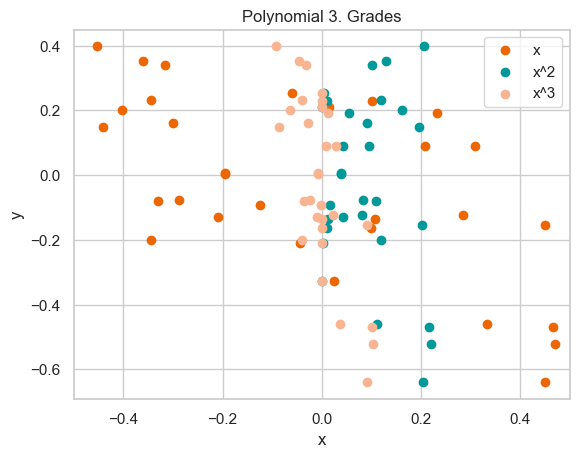

In [75]:
plt.scatter(df_poly_3.x, df_poly_3.y, label='x')
plt.scatter(df_poly_3.x**2, df_poly_3.y, label='x^2')
plt.scatter(df_poly_3.x**3, df_poly_3.y, label='x^3')
plt.title('Polynomial 3. Grades')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(X_REGION)
plt.legend(['x', 'x^2', 'x^3'])
plt.show()

In [76]:
X_test_poly_3 = poly_3.transform(X_test)
X_plot = np.linspace(*X_REGION, 100).reshape(-1, 1)
X_plot_poly_3 = poly_3.transform(X_plot)

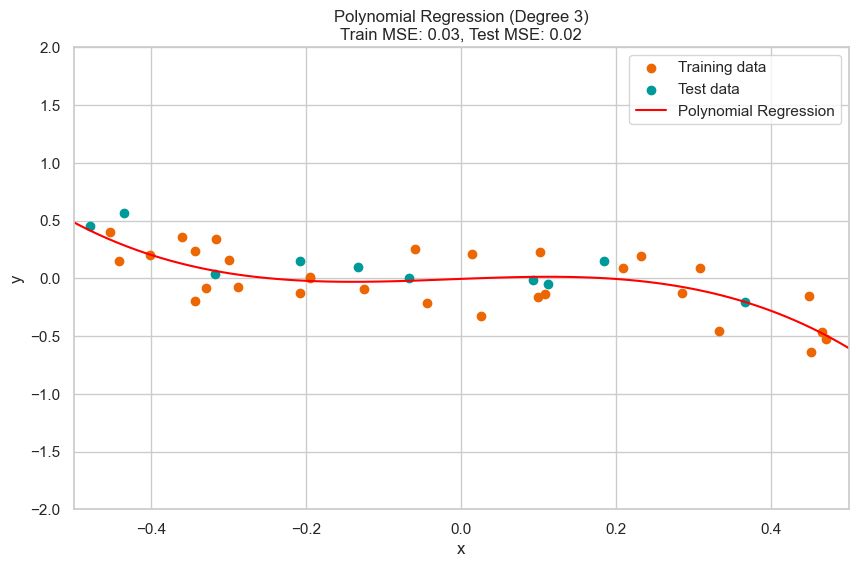

In [77]:
model = LinearRegression()
model.fit(X_train_poly_3, y_train)
y_train_pred = model.predict(X_train_poly_3)
y_test_pred = model.predict(X_test_poly_3)
y_plot_pred = model.predict(X_plot_poly_3)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label='Training data')
plt.scatter(X_test, y_test, label='Test data')
plt.plot(np.linspace(X_REGION[0], X_REGION[1], 100), y_plot_pred, label='Polynomial Regression', color='red')
plt.title(f'Polynomial Regression (Degree 3)\nTrain MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(X_REGION)
plt.ylim(-2, 2)
plt.legend()
plt.show()

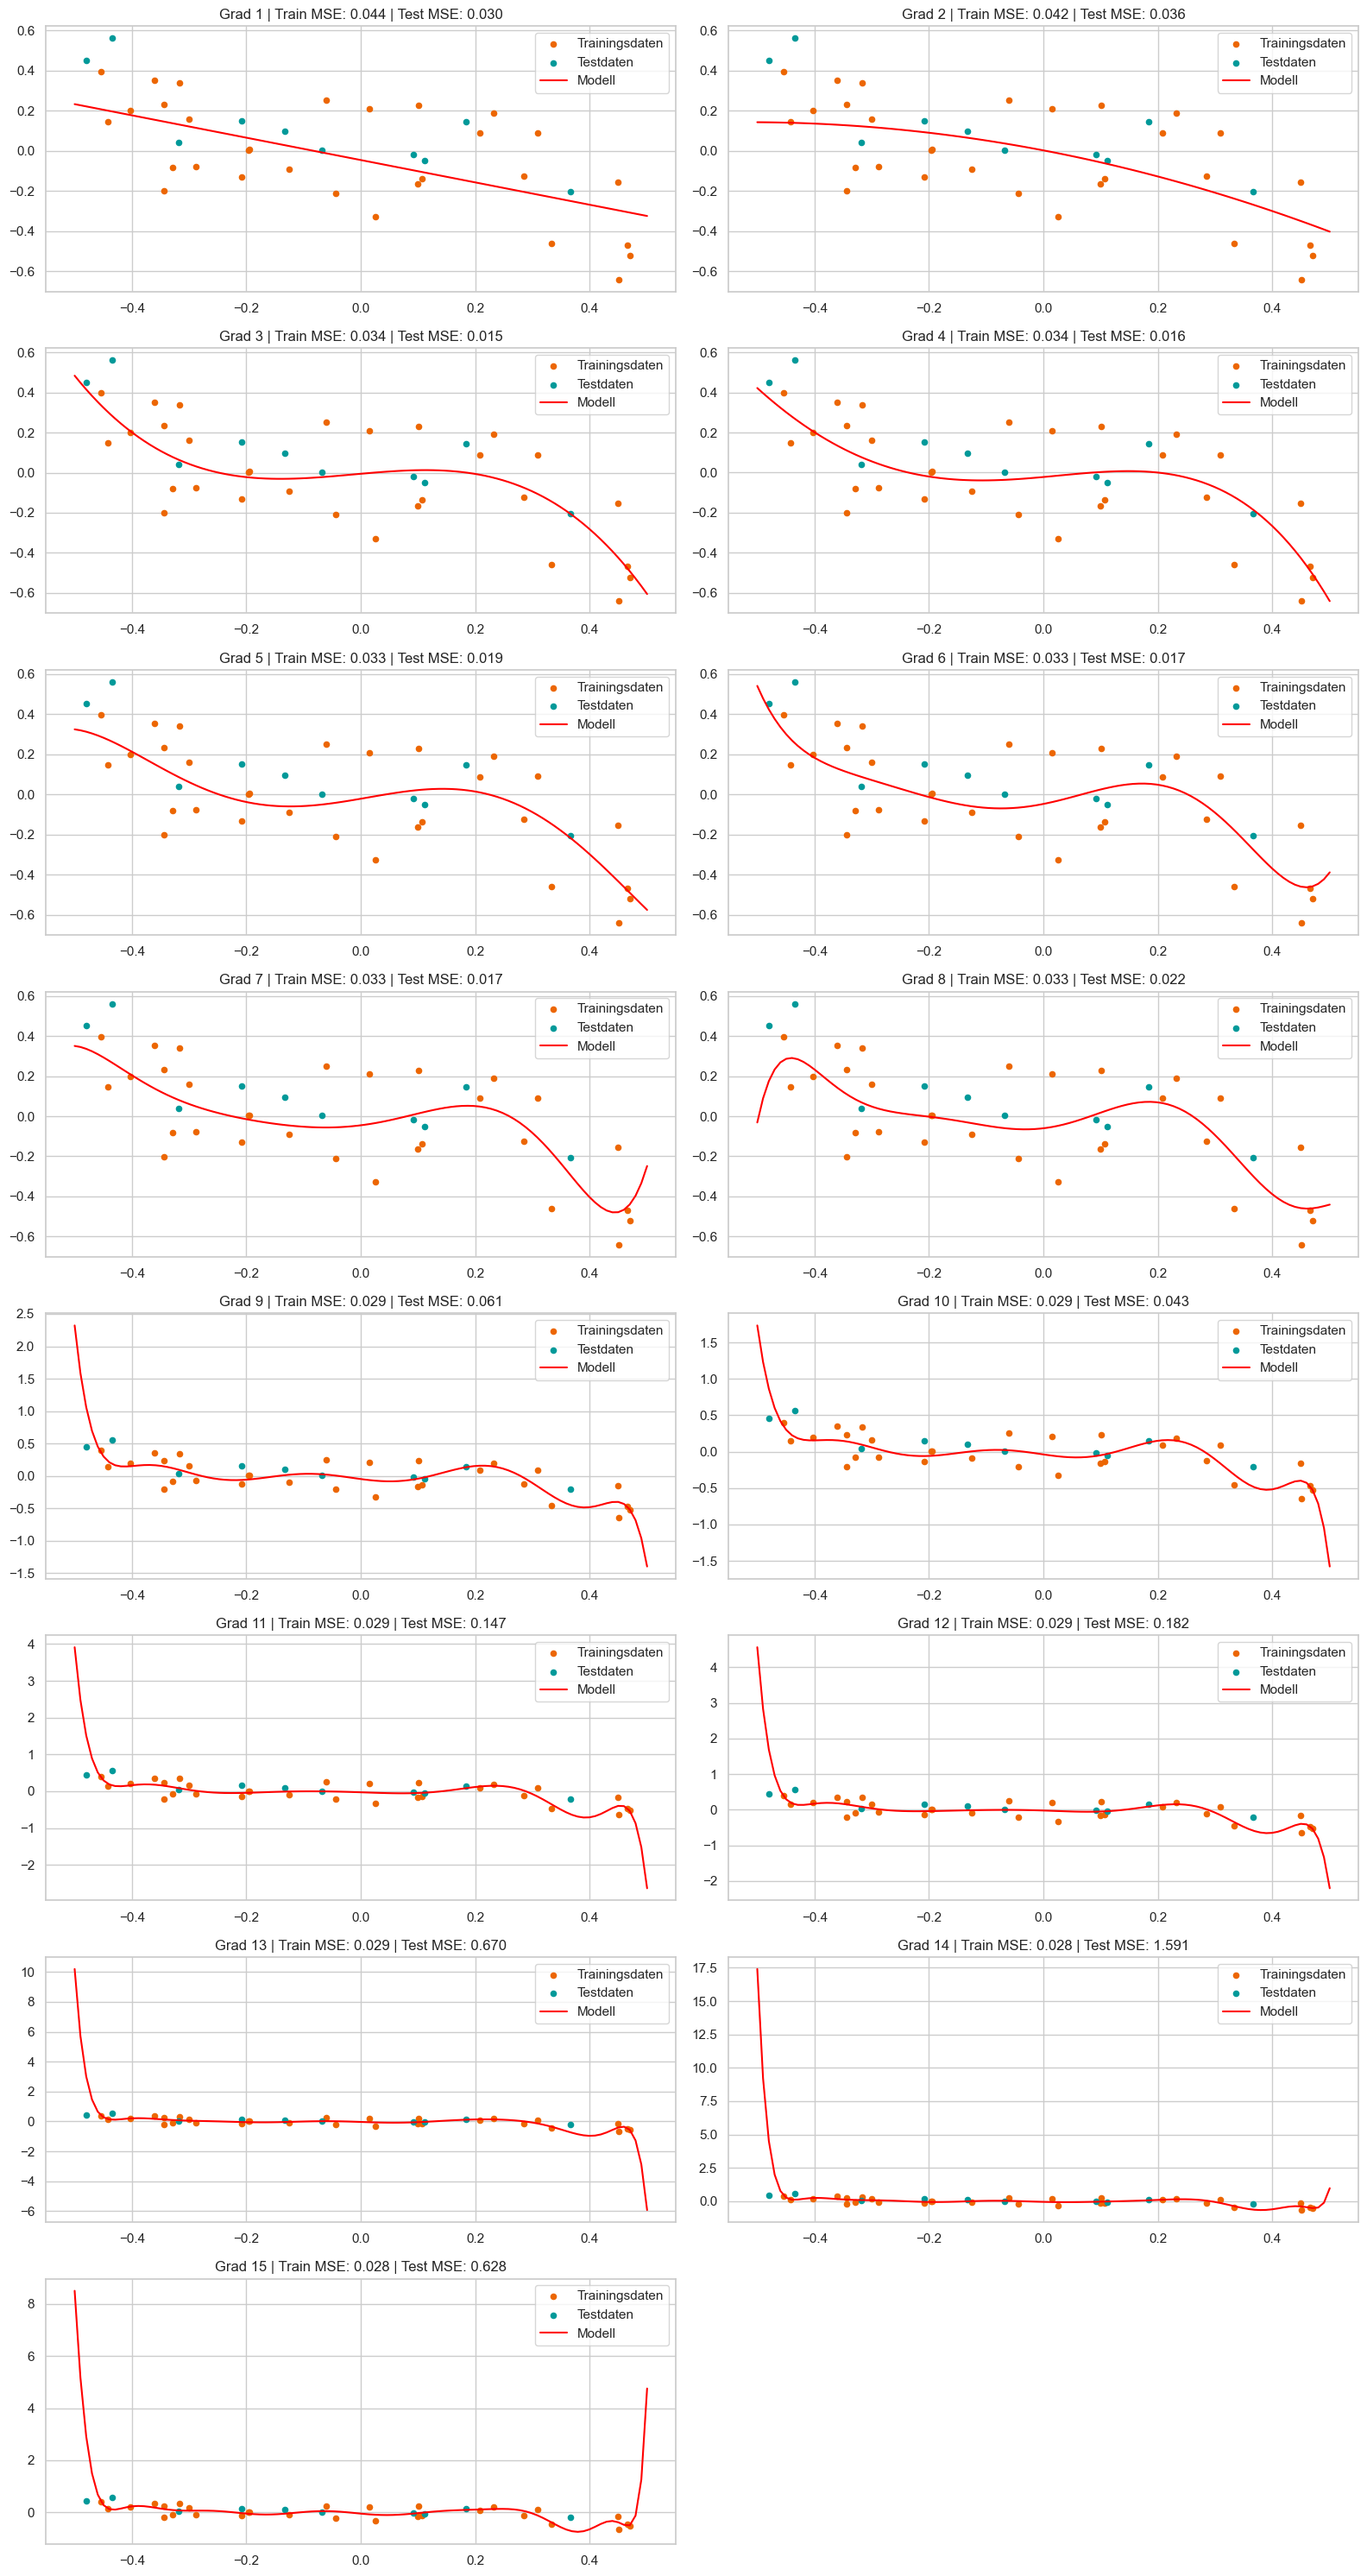

In [78]:
degrees = range(1, 16)
train_errors = []
test_errors = []

plt.figure(figsize=(16, 30))

for degree in range(*DEGREES):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    X_plot_poly = poly.transform(X_plot)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    y_plot_pred = model.predict(X_plot_poly)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_mse)
    test_errors.append(test_mse)

    plt.subplot(8, 2, degree)
    plt.title(f"Grad {degree} | Train MSE: {train_mse:.3f} | Test MSE: {test_mse:.3f}")
    plt.scatter(X_train, y_train, label="Trainingsdaten", s=20)
    plt.scatter(X_test, y_test, label="Testdaten", s=20)
    plt.plot(X_plot, y_plot_pred, label="Modell", color='red')
    plt.legend()

plt.tight_layout()
plt.show()

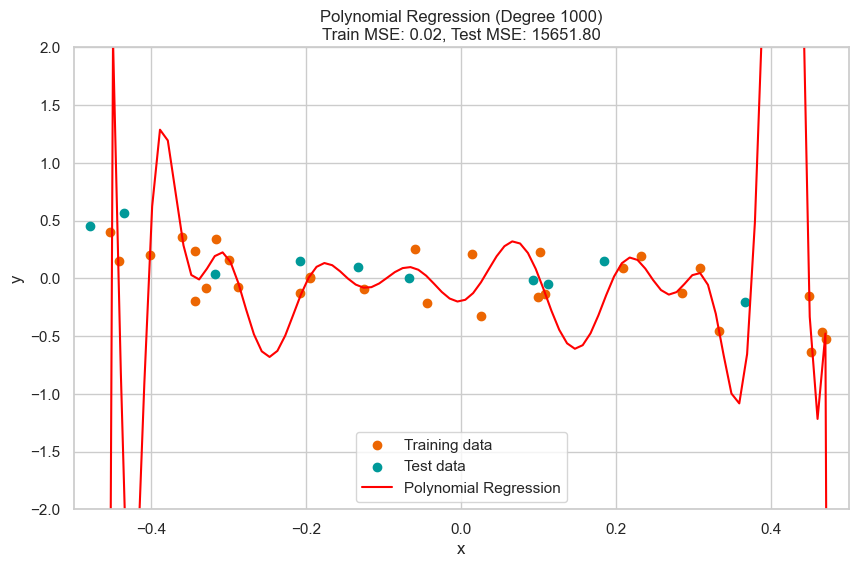

In [79]:
poly_100 = PolynomialFeatures(degree=1000)
X_train_poly_100 = poly_100.fit_transform(X_train)
X_test_poly_100 = poly_100.transform(X_test)
X_plot_poly_100 = poly_100.transform(X_plot)
model = LinearRegression()
model.fit(X_train_poly_100, y_train)
y_train_pred = model.predict(X_train_poly_100)
y_test_pred = model.predict(X_test_poly_100)
y_plot_pred = model.predict(X_plot_poly_100)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label='Training data')
plt.scatter(X_test, y_test, label='Test data')
plt.plot(X_plot, y_plot_pred, label='Polynomial Regression', color='red')
plt.title(f'Polynomial Regression (Degree 1000)\nTrain MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(X_REGION)
plt.ylim(-2, 2)
plt.legend()
plt.show()

c) Reflexion
- Bei welchem Polynomgrad ist der Testfehler minimal? Begründen Sie.

Beim Polynom 3. Grades ist der Trainings- und Testfehler ingesamt am kleinsten, danach verbessert der Testfehler nie.

Frage: Warum ist es immer noch eine "lineare" Regression, wenn wir jetzt Polynome höherer Grade verwenden.